<a href="https://colab.research.google.com/github/asillymind22/AI/blob/main/RNN_CNN_Face_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [ ]:
danhsach = ['Domixi','Me']
!ls /content/gdrive/MyDrive/AIDRIVE/DetectFace

Domixi	Me


In [ ]:
dir_train = '/content/gdrive/MyDrive/AIDRIVE/DetectFace'

In [ ]:
distpath = []
y_train = []
x_train = []
x_test = []
y_test = []
def create_data(dir, x_train, y_train):
  for i in danhsach:
    path = os.path.join(dir,i)
    index_label = danhsach.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(32,32)) 
      img = img_to_array(img)
      img = img.reshape(32,32,3)
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)


In [ ]:
create_data(dir_train, x_train, y_train)  
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train, 2)
print(x_train.shape)
print(y_train.shape)

(124, 32, 32, 3)
(124, 2)


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(2,activation='softmax'))


In [ ]:
# RNN
# model = Sequential()

# model.add(Dense(1024, activation ='relu', input_shape=(1024,)))
# model.add(Dropout(0.2))
# model.add(Dense(512, activation ='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(2, activation ='softmax'))
# model.summary()

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 30,batch_size= 10,verbose=1)

Epoch 1/30
13/13 [==============================] - 2s 98ms/step - loss: 0.5944 - accuracy: 0.7177
Epoch 2/30
13/13 [==============================] - 1s 94ms/step - loss: 0.3565 - accuracy: 0.8871
Epoch 3/30
13/13 [==============================] - 1s 94ms/step - loss: 0.2221 - accuracy: 0.9355
Epoch 4/30
13/13 [==============================] - 1s 96ms/step - loss: 0.2390 - accuracy: 0.9032
Epoch 5/30
13/13 [==============================] - 1s 93ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 6/30
13/13 [==============================] - 1s 98ms/step - loss: 2.8760e-04 - accuracy: 1.0000
Epoch 7/30
13/13 [==============================] - 1s 93ms/step - loss: 4.8383e-05 - accuracy: 1.0000
Epoch 8/30
13/13 [==============================] - 1s 93ms/step - loss: 8.2157e-05 - accuracy: 1.0000
Epoch 9/30
13/13 [==============================] - 1s 91ms/step - loss: 4.0741e-05 - accuracy: 1.0000
Epoch 10/30
13/13 [==============================] - 1s 93ms/step - loss: 1.8037e-05 - accura

In [ ]:
model.save('CNN_Face_test')

INFO:tensorflow:Assets written to: CNN_Face_test/assets


In [ ]:
# model.save('CNN_Face_test')

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from pathlib import Path
from PIL import Image

0

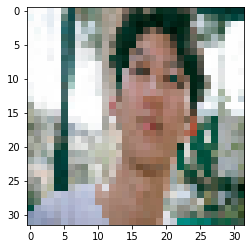

In [ ]:
img = load_img('/content/me.jpg',target_size=(32,32))
plt.imshow(img)
img = np.reshape(img,[1,32,32,3])
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))

In [ ]:
# RNN test
# img = load_img('/content/me.jpg', grayscale=True, target_size=(32,32))
# plt.imshow(img)
# img = img_to_array(img)
# img = np.reshape(img,[1,1024])
# img = img.astype('float32')
# img = img / 255.0
# np.argmax(model.predict(img))